In [3]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from pprint import pprint

In [4]:
def set_seeds(seed=100): 
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
set_seeds()

In [5]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
a = a.reshape((len(a), -1))

In [7]:
a.shape

(100, 1)

In [8]:
a[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [9]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [10]:
lags = 3
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)
pprint(list(g)[0])

(array([[[0],
        [1],
        [2]],

       [[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [6]]]),
 array([[3],
       [4],
       [5],
       [6],
       [7]]))


In [12]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

In [13]:
model = Sequential()
model.add(SimpleRNN(100, activation='relu',
                   input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adagrad', loss='mse',
             metrics=['mae'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [16]:
%%time
history = model.fit_generator(g, epochs=1000, steps_per_epoch=5,
                       verbose=False)

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


CPU times: total: 1min 19s
Wall time: 1min


In [17]:
res = pd.DataFrame(history.history)
res.tail(3)

,loss,mae
997,0.674275,0.681909
998,0.971620,0.841513
999,0.409005,0.494907


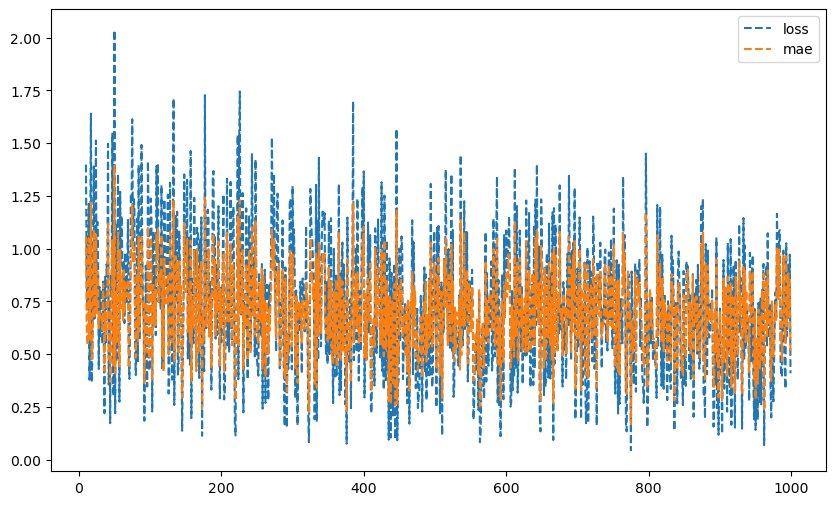

In [18]:
res.iloc[10:].plot(figsize=(10, 6), style=['--', '--']);

In [22]:
x = np.array([21, 22, 23]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

23

In [23]:
x = np.array([87, 88, 89]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

90

In [24]:
x = np.array([187, 188, 189]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

193

In [25]:
x = np.array([1187, 1188, 1189]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

1216

In [26]:
# Second Example

In [27]:
def transform(x):
    y = 0.05 * x ** 2 + 0.2 * x + np.sin(x) + 5
    y += np.random.standard_normal(len(x)) * 0.2
    return y

In [28]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
a = transform(x)

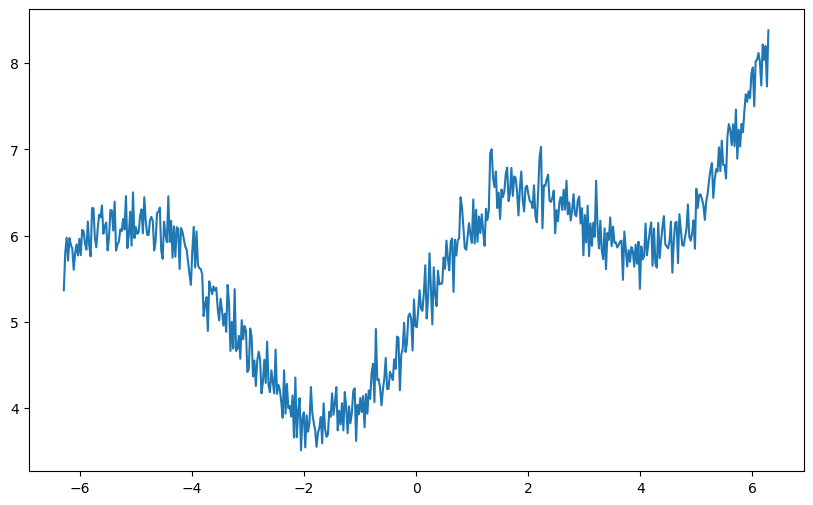

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x, a);

In [30]:
a = a.reshape((len(a), -1))
a[:5]

array([[5.36733072],
       [5.80024566],
       [5.97678996],
       [5.7102003 ],
       [5.97147192]])

In [31]:
lags = 5
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)

In [32]:
model = Sequential()
model.add(SimpleRNN(500, activation='relu', input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 500)               251000    
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 251,501
Trainable params: 251,501
Non-trainable params: 0
_________________________________________________________________


In [34]:
%%time
history = model.fit_generator(g, epochs=500,
                             steps_per_epoch=10,
                             verbose=False)

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


CPU times: total: 2min 13s
Wall time: 52.6 s


In [35]:
x = np.linspace(-6 * np.pi, 6 * np.pi, 1000) 
d = transform(x)

In [36]:
g_ = TimeseriesGenerator(d, d, length=lags, batch_size=len(d)) 
f = list(g_)[0][0].reshape((len(d) - lags, lags, 1)) 
y = model.predict(f, verbose=False) 

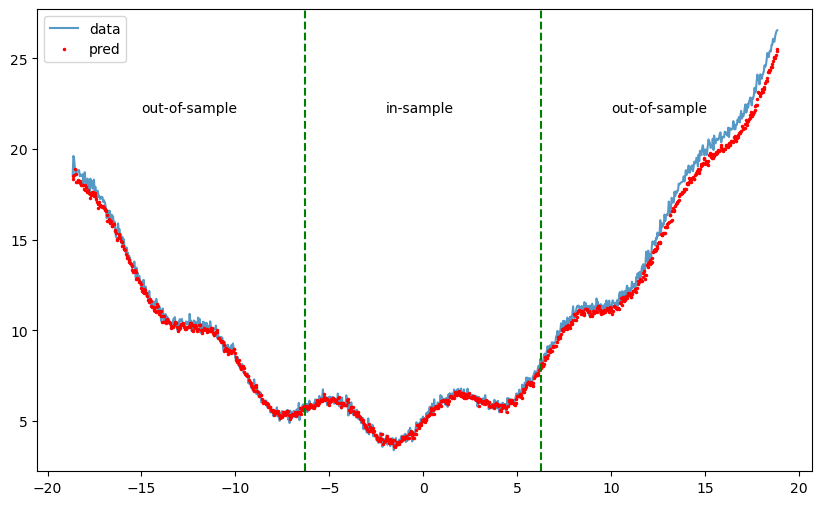

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(x[lags:], d[lags:], label='data', alpha=0.75)
plt.plot(x[lags:], y, 'r.', label='pred', ms=3)
plt.axvline(-2 * np.pi, c='g', ls='--')
plt.axvline(2 * np.pi, c='g', ls='--')
plt.text(-15, 22, 'out-of-sample')
plt.text(-2, 22, 'in-sample')
plt.text(10, 22, 'out-of-sample')
plt.legend();

In [39]:
# Financial Price Series

In [38]:
url = 'http://hilpisch.com/aiif_eikon_id_eur_usd.csv'
symbol = 'EUR_USD'
raw = pd.read_csv(url, index_col=0, parse_dates=True)
raw.head()

,HIGH,LOW,OPEN,CLOSE
Date,,,,
2019-10-01 00:00:00,1.0899,1.0897,1.0897,1.0899
2019-10-01 00:01:00,1.0899,1.0896,1.0899,1.0898
2019-10-01 00:02:00,1.0898,1.0896,1.0898,1.0896
2019-10-01 00:03:00,1.0898,1.0896,1.0897,1.0898
2019-10-01 00:04:00,1.0898,1.0896,1.0897,1.0898


In [40]:
def generate_data():
    data = pd.DataFrame(raw['CLOSE'])
    data.columns = [symbol]
    data = data.resample('30min', label='right').last().ffill()
    return data

In [42]:
data = generate_data()
data = (data - data.mean()) / data.std()
p = data[symbol].values
p = p.reshape((len(p), -1))

In [100]:
lags = 5
g = TimeseriesGenerator(p, p, length=lags, batch_size=5)

def create_rnn_model(hu=100, lags=lags, layer='SimpleRNN',
                        features=1, algorithm='estimation'):
    model = Sequential()
    if layer == 'SimpleRNN':
        model.add(SimpleRNN(hu, activation='relu',
                           input_shape=(lags, features)))
    else:
        model.add(LSTM(hu, activation='relu',
                      input_shape=(lags, features)))
    if algorithm == 'estimation':
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    else:
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

In [47]:
model = create_rnn_model()

In [48]:
%%time
history = model.fit_generator(g, epochs=500, steps_per_epoch=10,
                             verbose=False)

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


CPU times: total: 59.4 s
Wall time: 40.3 s


In [49]:
y = model.predict(g, verbose=False)

data['pred'] = np.nan
data['pred'].iloc[lags:] = y.flatten()

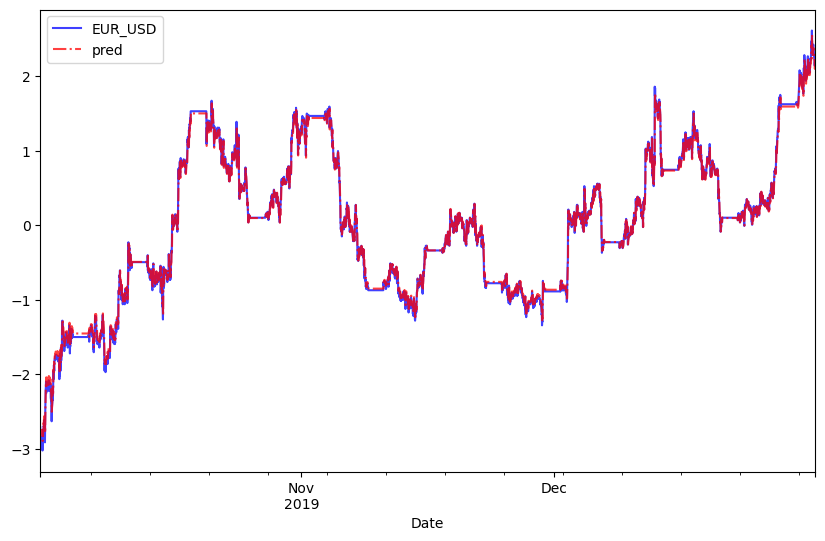

In [50]:
data[[symbol, 'pred']].plot(
                 figsize=(10, 6), style=['b', 'r-.'],
                 alpha=0.75);

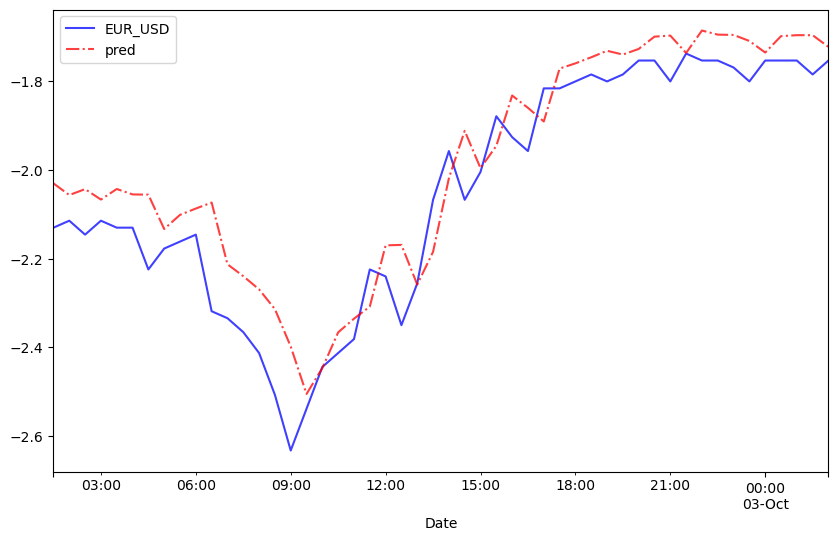

In [58]:
data[[symbol, 'pred']].iloc[50:100].plot(
     figsize=(10, 6), style=['b', 'r-.'],
     alpha=0.75);

In [59]:
# 예측이 잘된 것 처럼 보이지만 사실은 lagging된 예측

In [60]:
# Financial Return Series

In [61]:
data = generate_data()
data['r'] = np.log(data / data.shift(1))
data.dropna(inplace=True)

data = (data - data.mean()) / data.std()
r = data['r'].values
r = r.reshape((len(r), -1))
g = TimeseriesGenerator(r, r, length=lags, batch_size=5)

In [62]:
model = create_rnn_model()

In [63]:
%%time
history = model.fit_generator(g, epochs=500, steps_per_epoch=10,
                             verbose=False)

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


CPU times: total: 58.9 s
Wall time: 40.1 s


In [64]:
y = model.predict(g, verbose=False)

In [65]:
data['pred'] = np.nan
data['pred'].iloc[lags:] = y.flatten()
data.dropna(inplace=True)

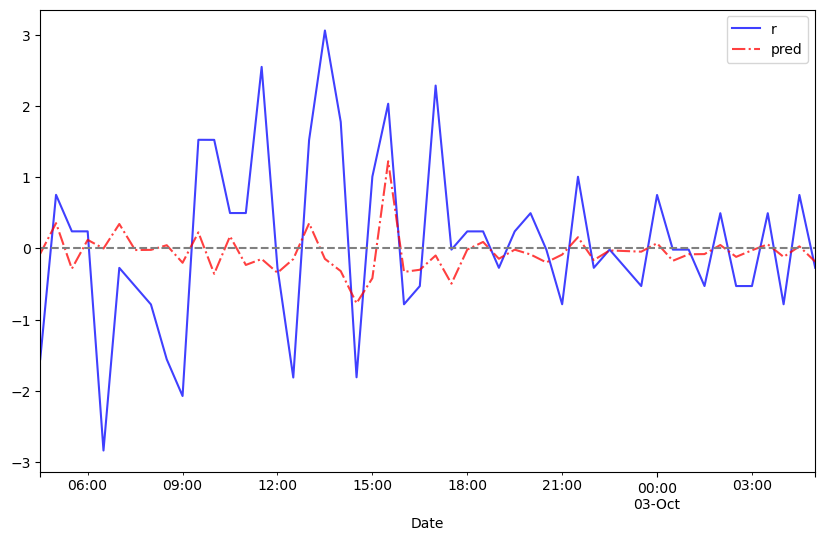

In [66]:
data[['r', 'pred']].iloc[50:100].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);
plt.axhline(0, c='grey', ls='--')

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(np.sign(data['r']), np.sign(data['pred']))

0.687457473349966

In [68]:
split = int(len(r) * 0.8)
train = r[:split]
test = r[split:]

g = TimeseriesGenerator(train, train, length=lags, batch_size=5)

In [69]:
set_seeds()
model = create_rnn_model(hu=100)

In [72]:
%%time
model.fit_generator(g, epochs=100, steps_per_epoch=10, verbose=False)

<timed eval>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


CPU times: total: 13.8 s
Wall time: 9.91 s


In [73]:
g_ = TimeseriesGenerator(test, test, length=lags, batch_size=5)
y = model.predict(g_)

176/176 [==============================] - 1s 2ms/step


In [74]:
accuracy_score(np.sign(test[lags:]), np.sign(y))

0.6765375854214123

In [75]:
# Financial Features

In [76]:
data = generate_data()
data['r'] = np.log(data / data.shift(1))

window = 20
data['mom'] = data['r'].rolling(window).mean()
data['vol'] = data['r'].rolling(window).std()
data.dropna(inplace=True)

In [84]:
split = int(len(data) * 0.8)
train = data.iloc[:split].copy()
mu, std = train.mean(), train.std()
train = (train - mu) / std

test = data.iloc[split:].copy()
test = (test - mu) / std

g = TimeseriesGenerator(train.values, train['r'].values, length=lags, batch_size=5)

In [85]:
set_seeds()
model = create_rnn_model(hu=100, features=len(data.columns),
                        layer='SimpleRNN')

In [91]:
%%time
history = model.fit_generator(g, epochs=100, steps_per_epoch=10,
                   verbose=False)

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


CPU times: total: 12.9 s
Wall time: 7.69 s


In [94]:
g_ = TimeseriesGenerator(test.values, test['r'].values,
                        length=lags, batch_size=5)
y = model.predict(g_).flatten()

175/175 [==============================] - 1s 3ms/step


In [95]:
accuracy_score(np.sign(test['r'].iloc[lags:]), np.sign(y))

0.43135011441647597

In [98]:
# classification

In [101]:
set_seeds()
model = create_rnn_model(hu=50,
            features=len(data.columns),
            layer='LSTM',
            algorithm='classification')

In [102]:
train_y = np.where(train['r'] > 0, 1, 0)

In [103]:
np.bincount(train_y)

array([2374, 1142], dtype=int64)

In [104]:
def cw(a):
    c0, c1 = np.bincount(a)
    w0 = (1 / c0) * (len(a)) / 2
    w1 = (1 / c1) * (len(a)) / 2
    return {0: w0, 1: w1}

In [105]:
g = TimeseriesGenerator(train.values, train_y,
                       length=lags, batch_size=5)

In [106]:
%%time
history = model.fit_generator(g, epochs=5, steps_per_epoch=10,
                             verbose=False, class_weight=cw(train_y))

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


CPU times: total: 4.02 s
Wall time: 4.13 s


In [107]:
test_y = np.where(test['r'] > 0, 1, 0)

g_ = TimeseriesGenerator(test.values, test_y,
                        length=lags, batch_size=5)
y = np.where(model.predict(g_, batch_size=None) > 0.5, 1, 0).flatten()

175/175 [==============================] - 1s 3ms/step


In [108]:
np.bincount(y)

array([530, 344], dtype=int64)

In [109]:
accuracy_score(test_y[lags:], y)

0.6064073226544623

In [110]:
# Deep RNNs

In [111]:
from keras.layers import Dropout

In [112]:
def create_deep_rnn_model(hl=2, hu=100, layer='SimpleRNN',
                        optimizer='rmsprop', features=1,
                        dropout=False, rate=0.3, seed=100):
    if hl <= 2: hl = 2
    if layer == 'SimpleRNN':
        layer = SimpleRNN
    else:
        layer = LSTM
    model = Sequential()
    model.add(layer(hu, input_shape=(lags, features),
                    return_sequences=True,
                    )) 
    if dropout:
        model.add(Dropout(rate, seed=seed)) 
    for _ in range(2, hl):
        model.add(layer(hu, return_sequences=True))
        if dropout:
            model.add(Dropout(rate, seed=seed)) 
    model.add(layer(hu)) 
    model.add(Dense(1, activation='sigmoid')) 
    model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

In [113]:
set_seeds()
model = create_deep_rnn_model(
            hl=2, hu=50, layer='SimpleRNN',
            features=len(data.columns),
            dropout=True, rate=0.3)

In [114]:
%%time
model.fit_generator(g, epochs=200, steps_per_epoch=10,
                   verbose=False, class_weight=cw(train_y))

<timed eval>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


CPU times: total: 39.2 s
Wall time: 25 s


In [115]:
y = np.where(model.predict(g_, batch_size=None) > 0.5, 1, 0).flatten()

175/175 [==============================] - 1s 4ms/step


In [116]:
np.bincount(y)

array([415, 459], dtype=int64)

In [117]:
accuracy_score(test_y[lags:], y)

0.5869565217391305